# Problem Statement: 
---
**Predict car usage:**
- Describe the historical car usage profile of RUM by type
    - Are the rates of changes in inventory correlated between car types?
- Based on available inventory, predict:
    - How long will new cars sit by car type
    - How much will it cost to keep each type of car at RUM after it is sent there
- Just for A and B cars, find patterns in car type (ie B357) usage
    - how long they sit

---
**Predict car usage:**
- predict inventory change based on current inventory (what does the train that gets built look like?) (just for loaded / loadable cars (A and B type boxcars))
    - what does the historical car usage profile of RUM stations look by 'aar car type'
    - how good is the model at preducting the train that gets built (the inventory change)
    
- using the model to anticipate which types of cars will get loaded and put on a trian, build a cheaper train
    - how much cheaper is your model's train?
    - how similar is it to the actualy train that was actually built (use 75% of data to train model, 25% for testing)

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
%matplotlib notebook


In [9]:
fn = r"C:\Users\Lenovo Thinkpad W520\Documents\Data Science\Projects\Final Project\Datasets\Online Snapshot.xlsx"
df = pd.read_excel(fn)
df

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,N,Y,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659


In [10]:
df.head()

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616


In [11]:
boxcar_type_list = [car_type for car_type in df['AAR Car Type'].unique() if car_type[0] in ['A', 'B']]                                            
boxcar_type_list                                                

['B357',
 'A402',
 'A432',
 'B414',
 'A405',
 'A603',
 'A302',
 'A332',
 'A305',
 'A406',
 'A403',
 'B415',
 'A606',
 'B314']

In [12]:
df_boxcar = df[df['AAR Car Type'].isin(boxcar_type_list)]
df_boxcar

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,N,Y,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659


In [13]:
list(df.columns)

['Equipment ID',
 'LE Status',
 'AAR Car Type',
 'AAR Car Kind',
 'AAR Car Type Description',
 'System Car',
 'Length',
 'Feet',
 'Inches',
 'Bad Order Ind',
 'Track ID',
 'STCC',
 'STCC Description',
 'Weight',
 'Tare Weight',
 'Last Move Type',
 'Last Move Date',
 'Last Move Time',
 'Shipper Customer ID',
 'Block To Customer ID',
 'Block To Address Type',
 'Switch To',
 'Switch To Address Type',
 'Switch To Customer ID',
 'Traffic Type',
 'Placement Ind',
 'Constructive Placement Ind',
 'Received Date',
 'Received Time',
 'Hours at Station',
 'Dwell Hours',
 'Storage Ind',
 'Car Hire Rate',
 'Create Date',
 'Create Time']

---
# RUM Car Inventory vs Time
---

In [14]:
df_gb = df.groupby('Create Date')['AAR Car Type'].value_counts()
df_gb

df3 = pd.DataFrame({'labels':df_gb.index.labels[0]})
dates = df3.replace(df3['labels'].unique(),df_gb.index.levels[0])
len(dates)

df4 = pd.DataFrame({'labels':df_gb.index.labels[1]})
car_types = df4.replace(df4['labels'].unique(),df_gb.index.levels[1])
len(car_types)

df5 = pd.DataFrame({'labels':df_gb.values})
len(df5['labels'])
df5.shape

df

df_clean2 = pd.DataFrame({'Date':dates['labels'],'Car_type':car_types['labels'],'count':df5['labels']})
df_clean2

,Date,Car_type,count
0,2017-09-24,,76
1,2017-09-24,A302,71
2,2017-09-24,A305,39
3,2017-09-24,A332,9
4,2017-09-24,A402,8
5,2017-09-24,A403,5
6,2017-09-24,A405,4
7,2017-09-24,A406,4
8,2017-09-24,A432,3
9,2017-09-24,A603,2


In [15]:
df_gb2 = df_clean2.groupby('Car_type')

fig, ax = plt.subplots()

for car in df_gb2.indices.keys():
    ax.plot(df_gb2.get_group(car)['Date'],df_gb2.get_group(car)['count'], label = car)

    
ax.set_ylabel('Number of Cars')
ax.set_xlabel('Date')    
leg = ax.legend()

<IPython.core.display.Javascript object>

# Now just for Boxcars

Make a list of A and B car types 

In [16]:
df['AAR Car Type'].unique()


array(['B357', 'C113', 'A402', 'D115', 'H250', 'H350', '    ', 'H340',
       'A432', 'B414', 'G515', 'M970', 'A405', 'C114', 'C614', 'T104',
       'C712', 'A603', 'C313', 'A302', 'A332', 'A305', 'C112', 'F343',
       'F242', 'A406', 'F483', 'A403', 'B415', 'J303', 'G532', 'A606',
       'F353', 'E707', 'F426', 'F326', 'B314', 'C312', 'C711', 'F413'],
      dtype=object)

In [17]:
df_boxcar_inv = df_clean2[df_clean2['Car_type'].isin(boxcar_type_list)]
df_boxcar_inv

,Date,Car_type,count
1,2017-09-24,A302,71
2,2017-09-24,A305,39
3,2017-09-24,A332,9
4,2017-09-24,A402,8
5,2017-09-24,A403,5
6,2017-09-24,A405,4
7,2017-09-24,A406,4
8,2017-09-24,A432,3
9,2017-09-24,A603,2
10,2017-09-24,A606,2


In [ ]:
a

<IPython.core.display.Javascript object>


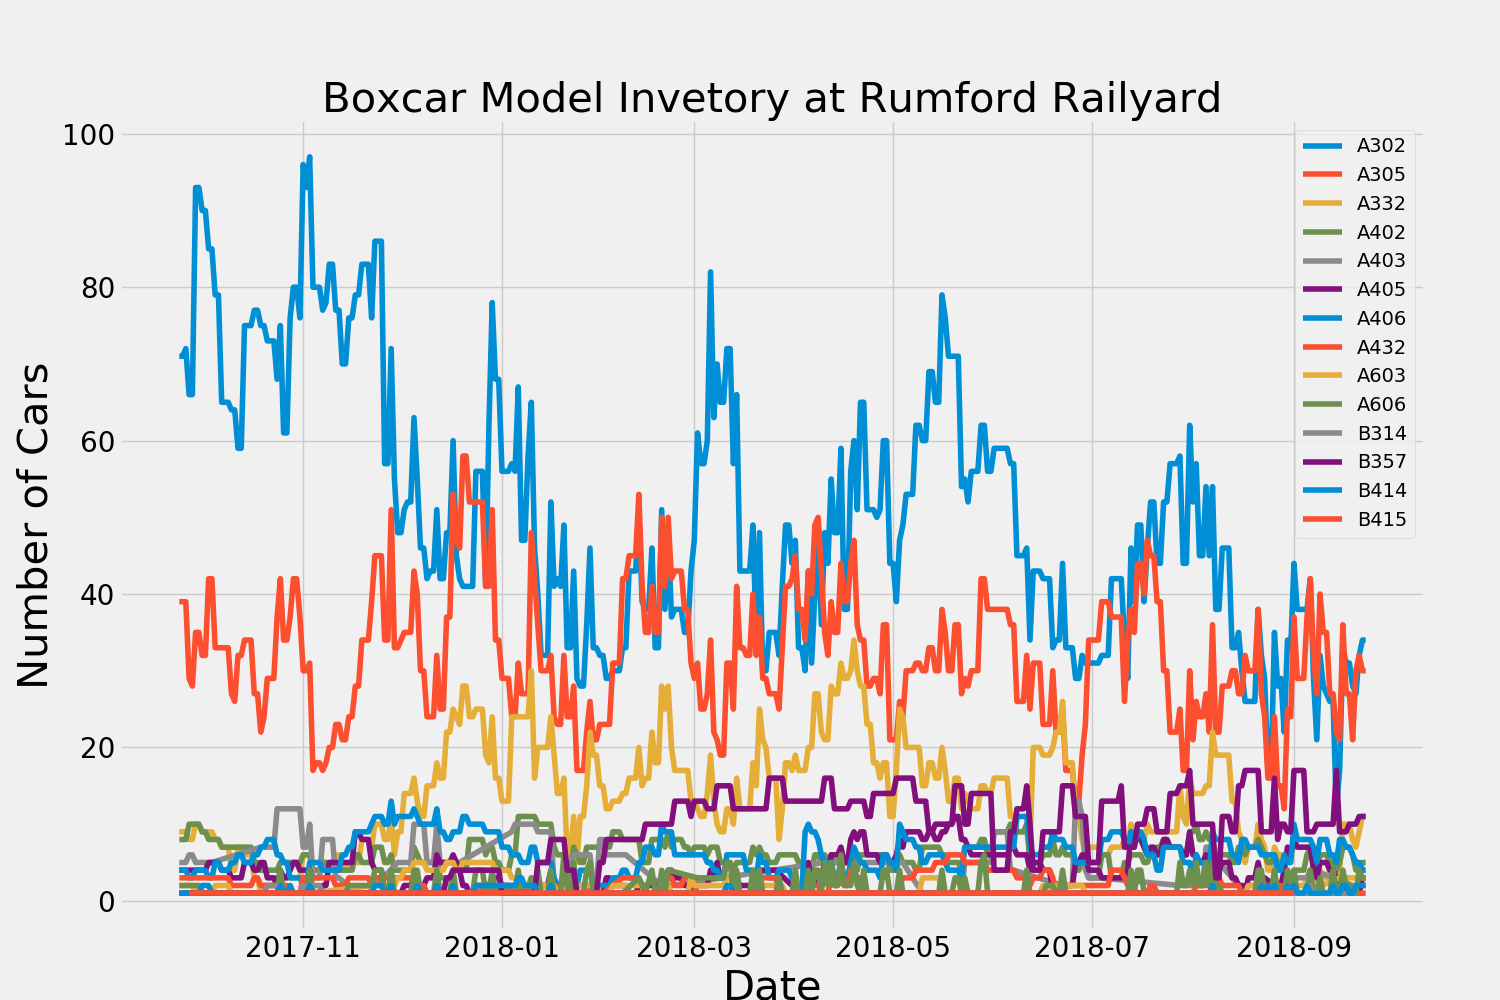

In [66]:
df_gb_boxcar_type = df_boxcar_inv.groupby('Car_type')

fig, ax = plt.subplots(figsize = (15,10))

for car in df_gb_boxcar_type.indices.keys():
    ax.plot(df_gb_boxcar_type.get_group(car)['Date'],df_gb_boxcar_type.get_group(car)['count'], label = car)

fontsize = 30    
ax.set_ylabel('Number of Cars', fontsize = fontsize)
ax.set_xlabel('Date', fontsize = fontsize)
ax.set_title('Boxcar Model Invetory at Rumford Railyard', fontsize = fontsize)
ax.tick_params(labelsize = fontsize-10)
leg = ax.legend()

---
# RUM Inventory Distributions by Car Kind
---

<IPython.core.display.Javascript object>


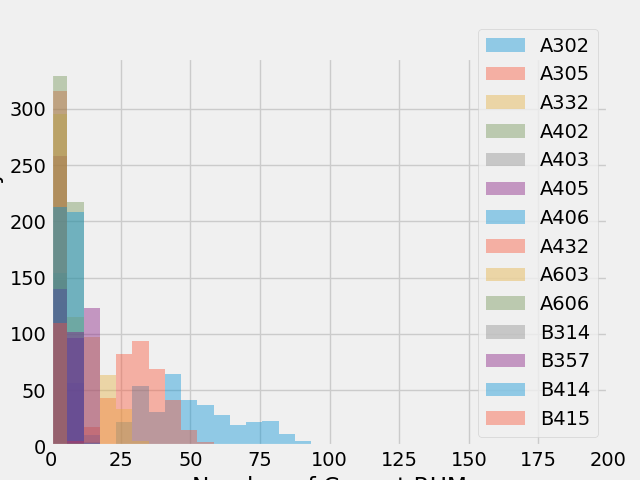

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users

In [56]:
fig, ax = plt.subplots()

#df_gb_car_type = df_clean.groupby('AAR Car Kind')['Hours at Station']
bins = 30
hist_kws = {'range': (0,175)}

for car in df_gb_boxcar_type.indices.keys():
#     ax.hist(df_gb2.get_group(car)['count'], label = car, bins = bins, range=(0,175))
    sns.distplot(df_gb_boxcar_type.get_group(car)['count'], label = car, bins = bins, hist_kws = hist_kws, kde = 0)

ax.set_xlim(0,200)
ax.set_xlabel('Number of Cars at RUM')
ax.set_ylabel('Number of Days')


leg = ax.legend()

# For each day, what was the inventory change in A and B cars?
---
check that 'lost' cars are L's in the loaded columns and not E's

In [20]:
df_boxcar_change = pd.DataFrame({'Date':df['Create Date'].astype(str).unique()})
df_boxcar_change

,Date
0,2018-08-17
1,2018-08-18
2,2018-08-19
3,2018-08-20
4,2018-08-21
5,2018-09-12
6,2018-09-13
7,2018-09-14
8,2018-09-15
9,2018-09-16


In [21]:
df_boxcar_change = pd.DataFrame({'Date':df['Create Date'].astype(str).unique()})
for boxcar_type in boxcar_type_list:
    df_boxcar_change = pd.concat([df_boxcar_change,pd.DataFrame({boxcar_type: df_gb_boxcar_type.get_group(boxcar_type)['count'].diff()}).reset_index(drop = True)],axis = 'columns')
df_boxcar_change

,Date,B357,A402,A432,B414,A405,A603,A302,A332,A305,A406,A403,B415,A606,B314
0,2018-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-08-19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-08-20,0.0,2.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-10.0,-1.0,1.0,0.0,0.0,0.0
4,2018-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
5,2018-09-12,0.0,0.0,0.0,0.0,0.0,-1.0,27.0,2.0,7.0,1.0,-1.0,0.0,0.0,0.0
6,2018-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-09-14,0.0,-1.0,0.0,1.0,0.0,0.0,-3.0,-1.0,-3.0,0.0,0.0,0.0,-1.0,0.0
8,2018-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2018-09-16,0.0,-1.0,0.0,0.0,1.0,0.0,-5.0,0.0,10.0,-1.0,0.0,0.0,0.0,0.0


Are 'lost' cars loaded?

In [22]:
df_boxcar_loss = df_boxcar_change.replace([float(x) for x in list(range(int(np.max(list(df_boxcar_change.max())[1:len(list(df_boxcar_change.max()))]))+1))],0)
df_boxcar_loss

,Date,B357,A402,A432,B414,A405,A603,A302,A332,A305,A406,A403,B415,A606,B314
0,2018-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-08-20,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-10.0,-1.0,0.0,0.0,0.0,0.0
4,2018-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
5,2018-09-12,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
6,2018-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-09-14,0.0,-1.0,0.0,0.0,0.0,0.0,-3.0,-1.0,-3.0,0.0,0.0,0.0,-1.0,0.0
8,2018-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2018-09-16,0.0,-1.0,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [23]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_boxcar_loss.corr(), cmap = 'Greens')

<IPython.core.display.Javascript object>

In [24]:
df_boxcar_inv ### date, type and count df goruped by type

,Date,Car_type,count
1,2017-09-24,A302,71
2,2017-09-24,A305,39
3,2017-09-24,A332,9
4,2017-09-24,A402,8
5,2017-09-24,A403,5
6,2017-09-24,A405,4
7,2017-09-24,A406,4
8,2017-09-24,A432,3
9,2017-09-24,A603,2
10,2017-09-24,A606,2


---
## Does the total inventory change over time?

The average number of cars at RUM this past year is 217 cars. (median = 218). It has had at most 300 cars and a minimum of 136. 

-----

In [25]:
df_gb_boxcar_date = df_boxcar_inv.groupby('Date')['count'].sum()

### Total inventory vs time

<IPython.core.display.Javascript object>


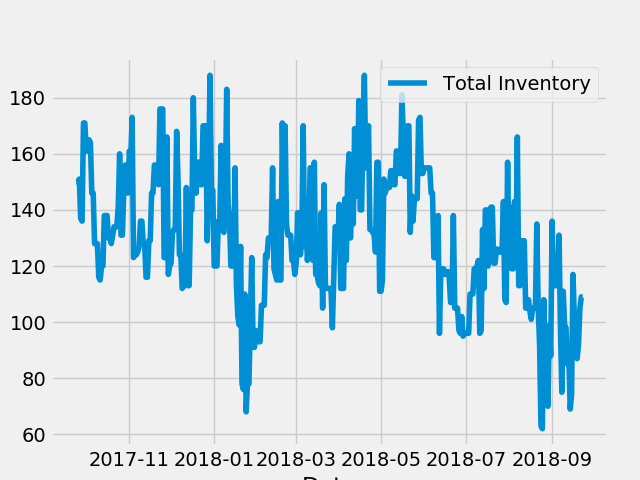

In [55]:
fig, ax = plt.subplots()

ax.plot(df_gb_boxcar_date, label = 'Total Inventory')
ax.set_ylabel('Total Number of Boxcars')
ax.set_xlabel('Date')

leg = ax.legend()

### Distribution of Total Inventory

<IPython.core.display.Javascript object>


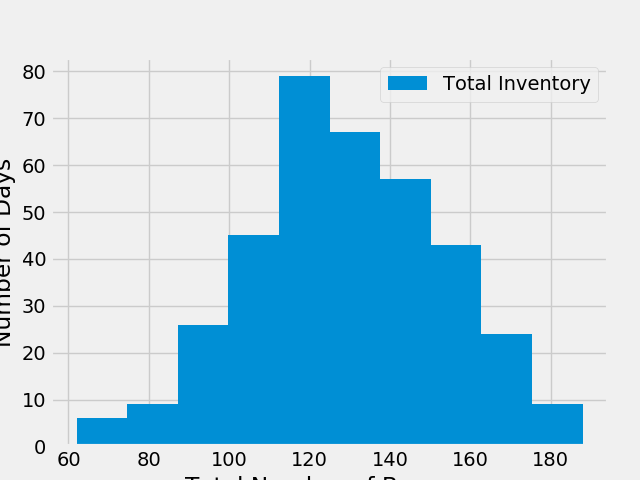

In [54]:
fig, ax = plt.subplots()

ax.hist(df_gb_boxcar_date, label = 'Total Inventory')
ax.set_ylabel('Number of Days')
ax.set_xlabel('Total Number of Boxcars')

leg = ax.legend()

In [28]:
df_gb_boxcar_date.describe()

count    365.000000
mean     129.180822
std       24.253133
min       62.000000
25%      113.000000
50%      129.000000
75%      147.000000
max      188.000000
Name: count, dtype: float64

# Relative Inventory vs Time by Kind

In [29]:
rel_stocks = [[]]*(len(df_gb_boxcar_type.indices.keys()))
len(rel_stocks)

14

In [30]:
df_gb_boxcar_date

Date
2017-09-24    150
2017-09-25    150
2017-09-26    151
2017-09-27    137
2017-09-28    136
2017-09-29    171
2017-09-30    171
2017-10-01    161
2017-10-02    161
2017-10-03    165
2017-10-04    164
2017-10-05    146
2017-10-06    146
2017-10-07    128
2017-10-08    128
2017-10-09    128
2017-10-10    116
2017-10-11    115
2017-10-12    120
2017-10-13    120
2017-10-14    138
2017-10-15    138
2017-10-16    138
2017-10-17    130
2017-10-18    130
2017-10-19    128
2017-10-20    131
2017-10-21    134
2017-10-22    134
2017-10-23    134
             ... 
2018-08-25     62
2018-08-26    108
2018-08-27     75
2018-08-28     78
2018-08-29     70
2018-08-30     99
2018-08-31     88
2018-09-01    136
2018-09-02    113
2018-09-03    113
2018-09-04    113
2018-09-05    116
2018-09-06    131
2018-09-07     98
2018-09-08     75
2018-09-09    111
2018-09-10     99
2018-09-11     98
2018-09-12     85
2018-09-13     89
2018-09-14     69
2018-09-15     74
2018-09-16    117
2018-09-17    102
2018-

In [31]:
df_gb_boxcar_type.indices.keys()

dict_keys(['A302', 'A305', 'A332', 'A402', 'A403', 'A405', 'A406', 'A432', 'A603', 'A606', 'B314', 'B357', 'B414', 'B415'])

---
# How long does each type of car sit at the station?
- 2899 unique cars passed through RUM in the past year
- 7991 entries and exits (some of the same cars come, leave, and come back)
- Kind H cars sit the longest
    - They sit on average 800h (almost 5 wks)
    - 110 of the 7991 cars traveling through RUM were kind H
- Kind F turnover the fastest
    - Only 1% of processed cars were kind F (79 of 7991)
---
**Boxcars:**
- 1152 unique boxcars through RUM in the last year


Make a df for each unique car ID:

In [32]:
equip_id_list = df_boxcar['Equipment ID'].unique()
df_equips = []

for equip_id in equip_id_list:
    df_equips.append(df_boxcar[df_boxcar['Equipment ID']==equip_id])

number of unique cars that passed through RUM

In [33]:
len(df_equips)

1152

Determine how long and how many times that car was at RUM:

In [34]:
###fix below to check if last entry for each car is on the same day as the last entry for hte dataset. do not include that point if so. Maybe.

In [35]:
df_maxs = []
df_max_ts = []
df_max_kinds = []
df_max_ids = []
df_max_idxs = []
for df_equip in df_equips:
#     for hours in df_equip['Hours at Station']
    df_max = df_equip['Hours at Station'][(df_equip['Hours at Station'].shift(1) < df_equip['Hours at Station']) & (df_equip['Hours at Station'].shift(-1) < df_equip['Hours at Station']) | (df_equip.index == df_equip.index.max())]
    df_maxs.append(pd.Series(df_max,index = df_max.index))
    df_max_ts.append(pd.Series(df_equip['Create Date'][df_max.index],index = df_max.index))
    df_max_kinds.append(pd.Series(df_equip['AAR Car Kind'][df_max.index],index = df_max.index))
    df_max_ids.append(pd.Series(df_equip['Equipment ID'][df_max.index],index = df_max.index))
    df_max_idxs.append(pd.Series(df_max.index,index = df_max.index))

<IPython.core.display.Javascript object>


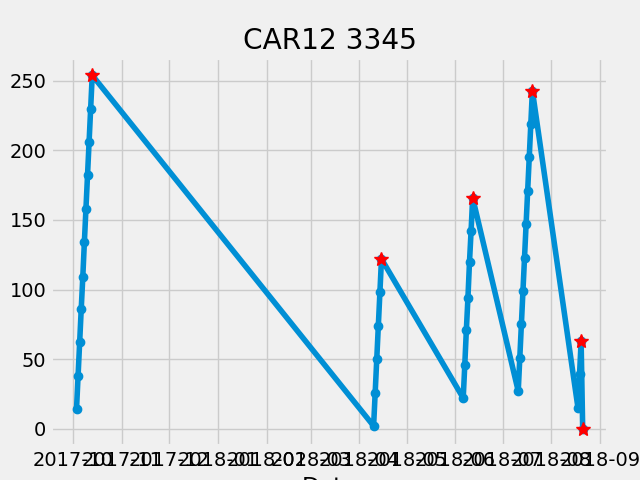

Text(0.5,1,'CAR12 3345')

In [53]:
fig,ax = plt.subplots()
i=50
ax.plot(df_equips[i]['Create Date'],df_equips[i]['Hours at Station'], marker = 'o')
ax.plot(df_max_ts[i],df_maxs[i], marker='*', linestyle = 'None', color = 'r', markersize = 10)

ax.set_xlabel('Date')
ax.set_ylabel('Hours at Station / h')
ax.set_title(list(df_equips[i]['Equipment ID'])[-1])

In [37]:
equip_id_series = pd.DataFrame()
equip_date_series = pd.DataFrame()
equip_kind_series = pd.DataFrame()
equip_maxh_series = pd.DataFrame()
equip_idx_series = pd.DataFrame()
for df_max_t,df_max_kind,df_max_id,df_max,df_max_idx in zip(df_max_ts,df_max_kinds,df_max_ids,df_maxs,df_max_idxs):
    equip_id_series = pd.concat([equip_id_series,df_max_id])
    equip_date_series = pd.concat([equip_date_series,df_max_t])
    equip_kind_series = pd.concat([equip_kind_series,df_max_kind])
    equip_maxh_series = pd.concat([equip_maxh_series,df_max])
    equip_idx_series = pd.concat([equip_idx_series,df_max_idx])

In [38]:
df_max_hours = pd.DataFrame({'EQUIP_ID':equip_id_series[0],'KIND':equip_kind_series[0],'MAX_HOURS_AT_STATION':equip_maxh_series[0],'DEPART_DATE':equip_date_series[0]})
df_max_hours

,EQUIP_ID,KIND,MAX_HOURS_AT_STATION,DEPART_DATE
3,CAR1 0594,B,96.0,2018-08-20
9,CAR1 0594,B,112.0,2018-09-16
12,CAR1 1109,B,53.0,2018-09-23
17,CAR1 1385,B,112.0,2018-09-20
18,CAR1 1385,B,0.0,2018-09-21
37,CAR1 1387,B,441.0,2018-08-02
39,CAR1 1387,B,49.0,2018-08-17
41,CAR1 1387,B,28.0,2018-08-23
46,CAR1 1824,B,116.0,2018-09-23
53,CAR1 1830,B,168.0,2018-08-23


In [39]:
gb_max_hours = df_max_hours.groupby('KIND')

<IPython.core.display.Javascript object>


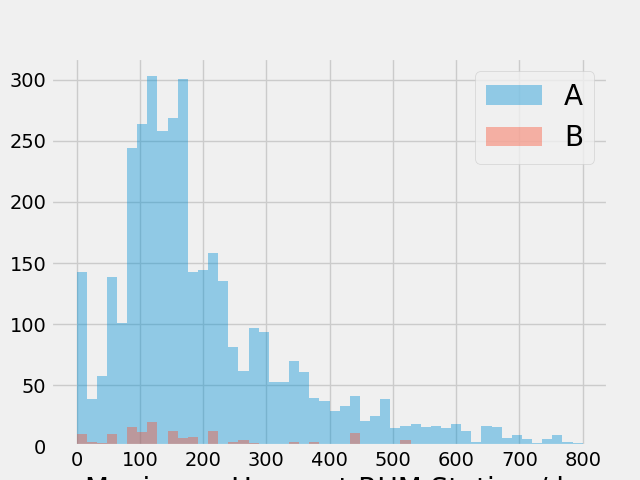

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [52]:
fig, ax = plt.subplots()

bins = 50
hist_kws = {'range': (0,800)}
fontsize = 20

for kind in gb_max_hours.indices.keys():
    ax = sns.distplot(gb_max_hours.get_group(kind)['MAX_HOURS_AT_STATION'], label = kind, bins = bins, hist_kws = hist_kws, kde = 0, ax=ax)

ax.set_xlabel('Maximum Hours at RUM Station / h',fontsize = fontsize)
ax.set_ylabel('Number of cars',fontsize = fontsize)

leg = ax.legend(fontsize = fontsize)

<IPython.core.display.Javascript object>


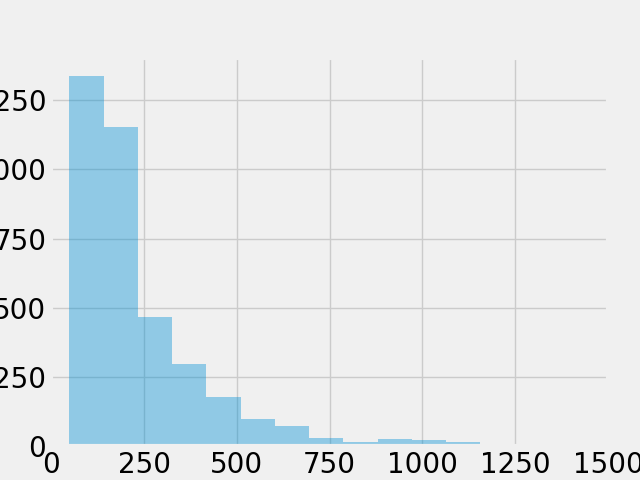

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [51]:
df_overtime = df_max_hours[df_max_hours['MAX_HOURS_AT_STATION'] >48]
fig, ax = plt.subplots()
fontsize = 25

sns.distplot(df_overtime['MAX_HOURS_AT_STATION'], bins = 60, kde = 0)
ax.set_xlim(0,1500)
ax.tick_params(labelsize = fontsize -5)
ax.set_xlabel('Dwell Time / h', fontsize = fontsize)
ax.set_ylabel('Number of Railcars passed Target', fontsize = fontsize);

<IPython.core.display.Javascript object>


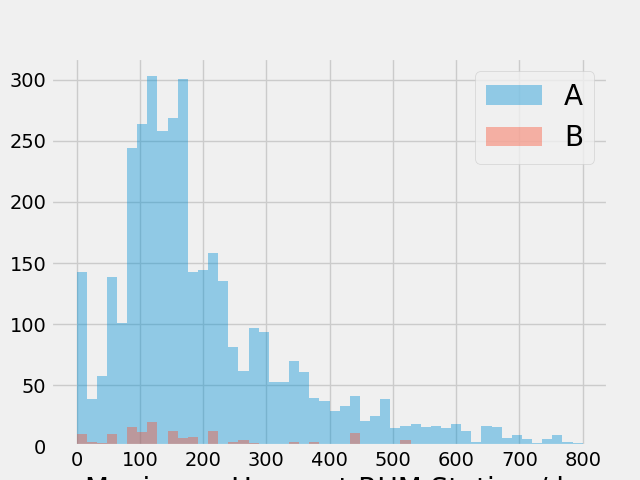

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [50]:
fig, ax = plt.subplots()

bins = 50
hist_kws = {'range': (0,800)}
fontsize = 20

for kind in gb_max_hours.indices.keys():
    ax = sns.distplot(gb_max_hours.get_group(kind)['MAX_HOURS_AT_STATION'], label = kind, bins = bins, hist_kws = hist_kws, kde = 0, ax=ax)

ax.set_xlabel('Maximum Hours at RUM Station / h',fontsize = fontsize)
ax.set_ylabel('Number of cars',fontsize = fontsize)

leg = ax.legend(fontsize = fontsize)

In [43]:
for kind in gb_max_hours.indices.keys():
    print(kind)
    print(gb_max_hours.get_group(kind)['MAX_HOURS_AT_STATION'].describe())

A
count    3846.000000
mean      227.057722
std       218.001369
min         0.000000
25%       110.000000
50%       166.000000
75%       278.000000
max      5585.000000
Name: MAX_HOURS_AT_STATION, dtype: float64
B
count    163.000000
mean     184.368098
std      140.008728
min        0.000000
25%       91.000000
50%      146.000000
75%      246.500000
max      635.000000
Name: MAX_HOURS_AT_STATION, dtype: float64


<IPython.core.display.Javascript object>


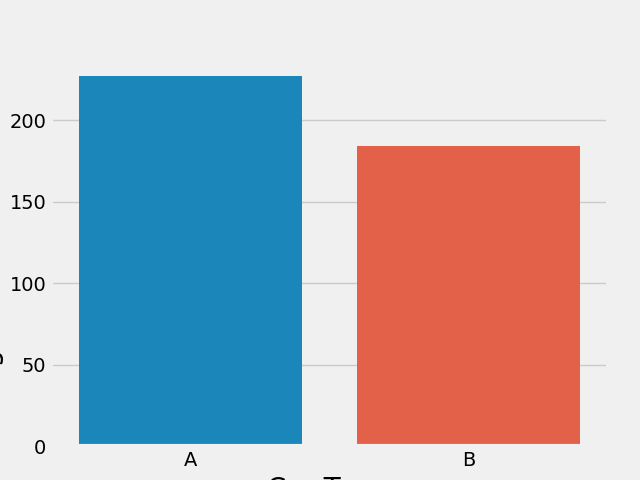

Text(0,0.5,'Mean Storage Hours at RUM Station / h')

In [49]:
fig, ax = plt.subplots()

fontsize = 20

ax = sns.barplot(x = list(gb_max_hours.indices.keys()), y = gb_max_hours['MAX_HOURS_AT_STATION'].mean(), orient = 'v', ax=ax)

ax.set_xlabel('Car Type',fontsize = fontsize)
ax.set_ylabel('Mean Storage Hours at RUM Station / h',fontsize = fontsize)



# Next Steps: 
- Because the data looks pretty flat, is a ML model needed to predict storage times for cars? Would a model do any better than guessing the mean over and over? Try it, but my guess is not.

In [45]:
for kind_1 in df_gb2.indices.keys():
    for kind_2 in df_gb2.indices.keys():
        cove = df_gb2.get_group(kind_1)['count'].corr(other = df_gb2.get_group(kind_2)['count'])
        print(kind_1+':'+kind_2+' = '+str(cove))

    :     = 1.0
    :A302 = nan
    :A305 = nan
    :A332 = nan
    :A402 = nan
    :A403 = nan
    :A405 = nan
    :A406 = nan
    :A432 = nan
    :A603 = nan
    :A606 = nan
    :B314 = nan
    :B357 = nan
    :B414 = nan
    :B415 = nan
    :C112 = nan
    :C113 = nan
    :C114 = nan
    :C312 = nan
    :C313 = nan
    :C614 = nan
    :C711 = nan
    :C712 = nan
    :D115 = nan
    :E707 = nan
    :F242 = nan
    :F326 = nan
    :F343 = nan
    :F353 = nan
    :F413 = nan
    :F426 = nan
    :F483 = nan
    :G515 = nan
    :G532 = nan
    :H250 = nan
    :H340 = nan
    :H350 = nan
    :J303 = nan
    :M970 = nan
    :T104 = nan
A302:     = nan
A302:A302 = 1.0
A302:A305 = nan
A302:A332 = nan
A302:A402 = nan
A302:A403 = nan
A302:A405 = nan
A302:A406 = nan
A302:A432 = nan
A302:A603 = nan
A302:A606 = nan
A302:B314 = nan
A302:B357 = nan
A302:B414 = nan
A302:B415 = nan
A302:C112 = nan
A302:C113 = nan
A302:C114 = nan
A302:C312 = nan
A302:C313 = nan
A302:C614 = nan
A302:C711 = nan
A302:C71

B414:H340 = nan
B414:H350 = nan
B414:J303 = nan
B414:M970 = nan
B414:T104 = nan
B415:     = nan
B415:A302 = nan
B415:A305 = nan
B415:A332 = nan
B415:A402 = nan
B415:A403 = nan
B415:A405 = nan
B415:A406 = nan
B415:A432 = nan
B415:A603 = nan
B415:A606 = nan
B415:B314 = nan
B415:B357 = nan
B415:B414 = nan
B415:B415 = nan
B415:C112 = nan
B415:C113 = nan
B415:C114 = nan
B415:C312 = nan
B415:C313 = nan
B415:C614 = nan
B415:C711 = nan
B415:C712 = nan
B415:D115 = nan
B415:E707 = nan
B415:F242 = nan
B415:F326 = nan
B415:F343 = nan
B415:F353 = nan
B415:F413 = nan
B415:F426 = nan
B415:F483 = nan
B415:G515 = nan
B415:G532 = nan
B415:H250 = nan
B415:H340 = nan
B415:H350 = nan
B415:J303 = nan
B415:M970 = nan
B415:T104 = nan
C112:     = nan
C112:A302 = nan
C112:A305 = nan
C112:A332 = nan
C112:A402 = nan
C112:A403 = nan
C112:A405 = nan
C112:A406 = nan
C112:A432 = nan
C112:A603 = nan
C112:A606 = nan
C112:B314 = nan
C112:B357 = nan
C112:B414 = nan
C112:B415 = nan
C112:C112 = 1.0
C112:C113 = nan
C112:C11

F343:F413 = nan
F343:F426 = nan
F343:F483 = nan
F343:G515 = nan
F343:G532 = nan
F343:H250 = nan
F343:H340 = nan
F343:H350 = nan
F343:J303 = nan
F343:M970 = nan
F343:T104 = nan
F353:     = nan
F353:A302 = nan
F353:A305 = nan
F353:A332 = nan
F353:A402 = nan
F353:A403 = nan
F353:A405 = nan
F353:A406 = nan
F353:A432 = nan
F353:A603 = nan
F353:A606 = nan
F353:B314 = nan
F353:B357 = nan
F353:B414 = nan
F353:B415 = nan
F353:C112 = nan
F353:C113 = nan
F353:C114 = nan
F353:C312 = nan
F353:C313 = nan
F353:C614 = nan
F353:C711 = nan
F353:C712 = nan
F353:D115 = nan
F353:E707 = nan
F353:F242 = nan
F353:F326 = nan
F353:F343 = nan
F353:F353 = nan
F353:F413 = nan
F353:F426 = nan
F353:F483 = nan
F353:G515 = nan
F353:G532 = nan
F353:H250 = nan
F353:H340 = nan
F353:H350 = nan
F353:J303 = nan
F353:M970 = nan
F353:T104 = nan
F413:     = nan
F413:A302 = nan
F413:A305 = nan
F413:A332 = nan
F413:A402 = nan
F413:A403 = nan
F413:A405 = nan
F413:A406 = nan
F413:A432 = nan
F413:A603 = nan
F413:A606 = nan
F413:B31

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)



H250:C113 = nan
H250:C114 = nan
H250:C312 = nan
H250:C313 = nan
H250:C614 = nan
H250:C711 = nan
H250:C712 = nan
H250:D115 = nan
H250:E707 = nan
H250:F242 = nan
H250:F326 = nan
H250:F343 = nan
H250:F353 = nan
H250:F413 = nan
H250:F426 = nan
H250:F483 = nan
H250:G515 = nan
H250:G532 = nan
H250:H250 = nan
H250:H340 = nan
H250:H350 = nan
H250:J303 = nan
H250:M970 = nan
H250:T104 = nan
H340:     = nan
H340:A302 = nan
H340:A305 = nan
H340:A332 = nan
H340:A402 = nan
H340:A403 = nan
H340:A405 = nan
H340:A406 = nan
H340:A432 = nan
H340:A603 = nan
H340:A606 = nan
H340:B314 = nan
H340:B357 = nan
H340:B414 = nan
H340:B415 = nan
H340:C112 = nan
H340:C113 = nan
H340:C114 = nan
H340:C312 = nan
H340:C313 = nan
H340:C614 = nan
H340:C711 = nan
H340:C712 = nan
H340:D115 = nan
H340:E707 = nan
H340:F242 = nan
H340:F326 = nan
H340:F343 = nan
H340:F353 = nan
H340:F413 = nan
H340:F426 = nan
H340:F483 = nan
H340:G515 = nan
H340:G532 = nan
H340:H250 = nan
H340:H340 = 1.0
H340:H350 = nan
H340:J303 = nan
H340:M9

In [46]:
df_gb_boxcar_type

In [47]:
fig,ax = plt.subplots()

kind_1 = 'A'
kind_2 = 'B'

ax.scatter(df_gbe.get_group(kind_1)['count'],df_gb_boxcar_type.get_group(kind_2)['count'])

<IPython.core.display.Javascript object>

NameError: name 'df_gbe' is not defined

In [48]:
all_kinds = []
all_max_hours = []

for df_max_kind in df_max_kinds:
    all_kinds = all_kinds+df_max_kind

for df_max in df_maxs:
    all_max_hours = all_max_hours+df_max

df_kind_max = pd.DataFrame({'kind':all_kinds,'max_hours':all_max_hours})
df_kind_max

TypeError: can only concatenate list (not "str") to list

In [ ]:
len(df['Create Date'].unique())

In [ ]:
len(df['Equipment ID'].unique())

In [ ]:
df_gb_car_type = df.groupby('Equipment ID')['Hours at Station']

In [ ]:
df['AAR Car Kind'].unique()

In [ ]:
fig, ax = plt.subplots()
df['Length_ft'] = df['Feet']+df['Inches']/12
df['Gross_wt'] = df['Weight']+df['Tare Weight']

df_ds = df[::80]
df_by_types = []
for car_type in df_ds['AAR Car Kind'].unique():
    df_by_types.append(df_ds[df_ds['AAR Car Kind']==car_type])

cp = sns.color_palette()
i=0 
for df_car in df_by_types:
    if i < len(cp):
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1
    else:
        i=0
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1

In [ ]:
%matplotlib notebook